# Iris Flowers Classification ML Project 

To build a machine learning model to classify iris flowers in this project. It involves using dataset containing measurements of iris flowers and their corresponding measurements of iris flowers and their corresponding species to train a model, which can then predict the species of new iris flowers based on their measurements.

##### Stpes:
1. Data collection : import csv file or in scikit library it is in-built dataset.
2. Data preprocessing :
       - Load dataset, explore dataset structure, check missing values, and visulize data.
       - Preprocess data if necessary, such as scaling numerical features, transform categorical to numerical variables.
3. Data spliting : split the data into training and testing
4. Choose model : select machine learning algorithm for classification.
       - Logistic regression
       - Random forests
       - Decision tree
       - K-nearest neighbour
       - Support vector machine
5. Train model : Fit the choosen model for train a data.
6. Evaluate model : Assess the model performance on test data using appropriate evaluation metrics such as accuracy, precision, recall, f1-score.
7. Prediction : Once satisfied with model's performance, make predictions on new data 
   

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Exploratory Data Analysis

##### Load dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
# display first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# display last 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


target variable : Species: iris flower species types
- iris-setosa
- iris-versicolor
- iris-virginica

In [5]:
# display shape of the dataset
df.shape

(150, 6)

There are 150 rows and 6 columns in the dataset.

In [6]:
# display columns in the dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# display information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# display statistical information about dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


count: Number of observations in the dataset. In this dataset there are 150 observations.

mean: It represents the mean of the each feature. SepalLengthCm mean is 5.84, SepalWidthCm mean is 3.05, PetalLengthCm mean is 3.75, PetalWidthCm width is 1.19.

Standard deviation: This measure the dispersion or spread of data points around mean. A higher std. deviation indicates that the data points are spread out over a wider range from the mean. SepalLengthCm has approximately std.dev is 0.83, SepalWidthCm std is 0.43, PetalLengthCm std is 1.76 and PetalWidthCm std is 0.76. 

Min :  this is the minimum value of the each feature.

25%(1st quartile) :  Also known as the first quartile, this value indicates the point below which 25% of the data falls. For example, 25% of SepalLengthCm observations are below 5.1, 25% of SepalWidthCm observations are below 2.8, 25% of PetalLengthCm observations are below 1.6, and 25% of PetalWidthCm observations are below 0.3.

50%(2nd quartile) : This is the median value, where 50% of the data falls below this value. It is also the same as the mean for a symmetric distribution. For example, 50% of SepalLengthCm observations are below 5.8, 50% of SepalWidthCm observations are below 3.0, 50% of PetalLengthCm observations are below 4.35, and 50% of PetalWidthCm observations are below 1.3.

75%(3rd quartile) : Also known as the third quartile, this value indicates the point below which 75% of the data falls. For instance, 75% of SepalLengthCm observations are below 6.4, 75% of SepalWidthCm observations are below 3.3, 75% of PetalLengthCm observations are below 5.1, and 75% of PetalWidthCm observations are below 1.8.

max : this is the maximum value of the each feature.


##### Missing values

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no any missing values in the dataset.

##### Duplicate values

In [10]:
df.duplicated().sum()

0

There is no any duplicate value in the dataset.

There is no use of 'Id' column in this dataset so we can drop it.

In [11]:
df.drop(['Id'], axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Data Visulization

##### Data Visulization for numerical columns.

1. Univariate analysis:

In [12]:
num_cols = df.describe().columns
num_cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [13]:
# create univariate analysis function for numerical columns.
def univariate_numericals(col):
    fig, ax = plt.subplots(1,2, figsize = (10,5))
    
    # histogram
    sns.histplot(x = df[col], bins = 10, ax = ax[0], kde = True)
    ax[0].set_title(f'Histogram for {col} distribution')

    # boxplot
    sns.boxplot(x = df[col], ax = ax[1])
    ax[1].set_title(f'Boxplot for {col} column')

    plt.show()

    #skewness
    skewness = df[col].skew()
    if skewness < 0:
        print(f'skewness for {col} column data is {skewness} ----> negatively skewed.')
    elif skewness > 0:
        print(f'skewness for {col} column data is {skewness} ----> positively skewed.')
    else:
        print(f'skewness for {col} column data is {skewness} ----> normally distributed.')

1. Univariate analysis for SepalLengthCm column.


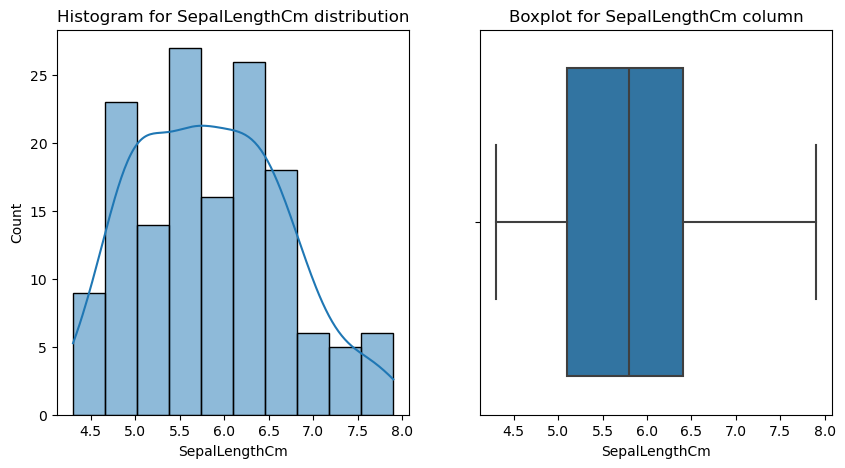

skewness for SepalLengthCm column data is 0.3149109566369728 ----> positively skewed.
2. Univariate analysis for SepalWidthCm column.


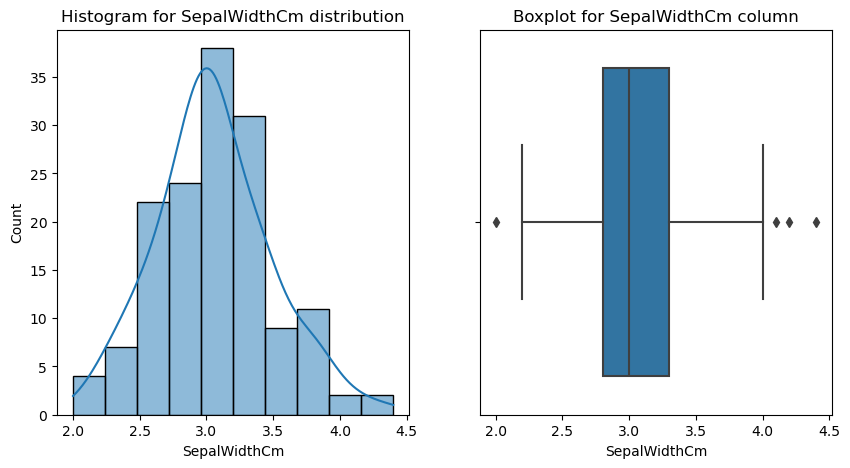

skewness for SepalWidthCm column data is 0.3340526621720866 ----> positively skewed.
3. Univariate analysis for PetalLengthCm column.


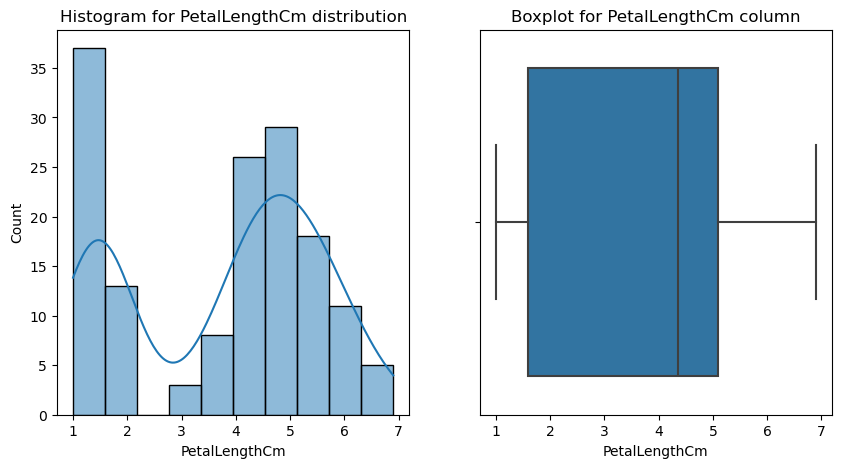

skewness for PetalLengthCm column data is -0.27446425247378287 ----> negatively skewed.
4. Univariate analysis for PetalWidthCm column.


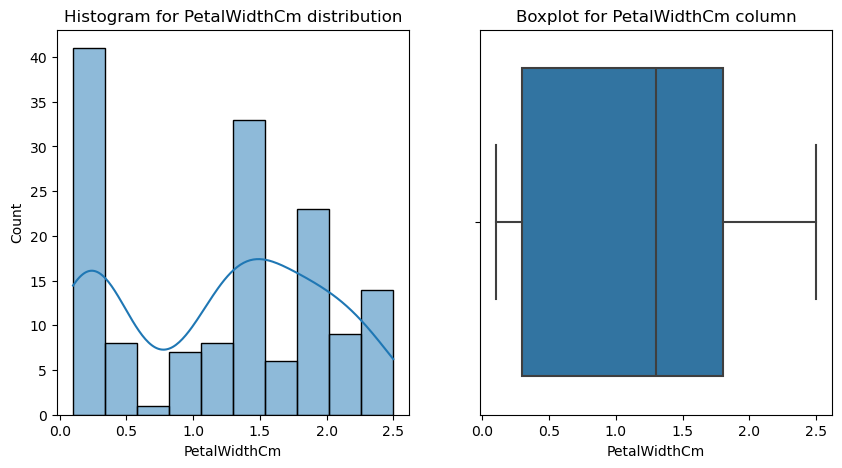

skewness for PetalWidthCm column data is -0.10499656214412734 ----> negatively skewed.


In [14]:
c = 1
for col in num_cols:
    print(f'{c}. Univariate analysis for {col} column.')
    univariate_numericals(col)
    c = c+1

In [15]:
cat_cols = df.describe(include = 'O').columns
cat_cols

Index(['Species'], dtype='object')

In [16]:
#Create univarite analysis function for categorical columns

def univariate_categorical(col):
    count = df[col].value_counts()
    print("Count of each categorical variable\n\n",count)

    fig, ax = plt.subplots(1,2, figsize = (10,5))

    # countplot
    sns.countplot(x = df[col], ax = ax[0])
    ax[0].set_title(f'Countplot for {col} ditsribution')

    # pie chart
    ax[1].pie(count, labels = count.index, autopct = '%1.1f%%')
    ax[1].set_title(f'Piechart for {col} column')
    plt.show()

1. Univariate analysis for categorical Species column.
Count of each categorical variable

 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


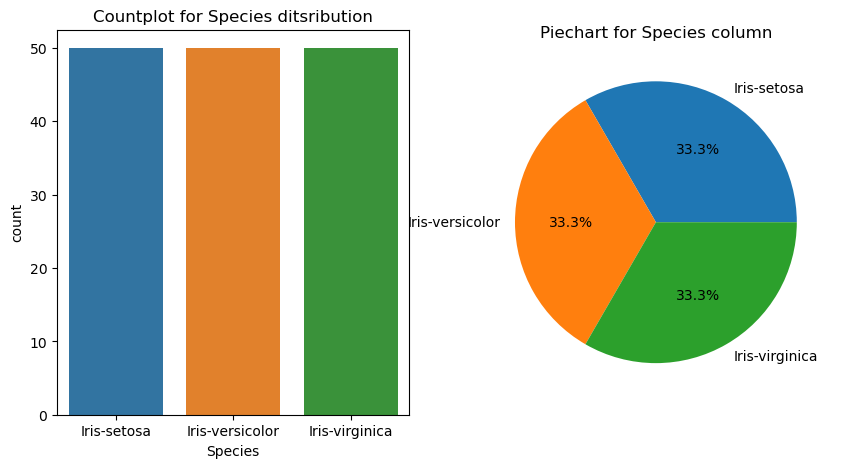

In [17]:
c = 1
for col in cat_cols:
    print(f'{c}. Univariate analysis for categorical {col} column.')
    univariate_categorical(col)
    c = c+1

2. Bivariate Analysis:

##### Scatter plots:
    Creating scatter plots to visulize the relationship between pair of variables. Here i am plotting plots SepelLengthCm against SepalWidthCm, PetalLengthCm against PetalWidthCm and SepalLengthCm against PetalLengthCm. Hence scatter plots finds the patterns such linear relationship, clusters.

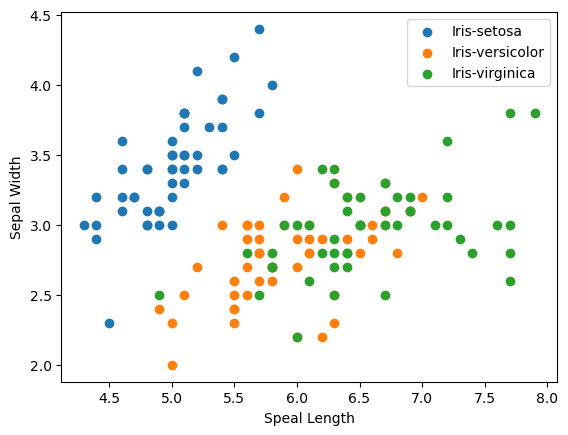

In [18]:
species = df['Species'].unique()
for i in range(len(species)):
    x = df[ df['Species'] == species[i] ]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], label = species[i])
plt.xlabel('Speal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

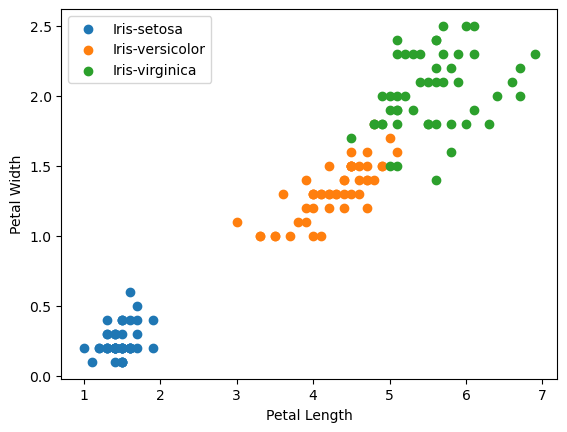

In [19]:
for i in range(len(species)):
    x = df[ df['Species'] == species[i] ]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

From the above graph we can see that iris setosa is one cluster, iris-versicolor is second cluster, iris-virginica is third cluster.

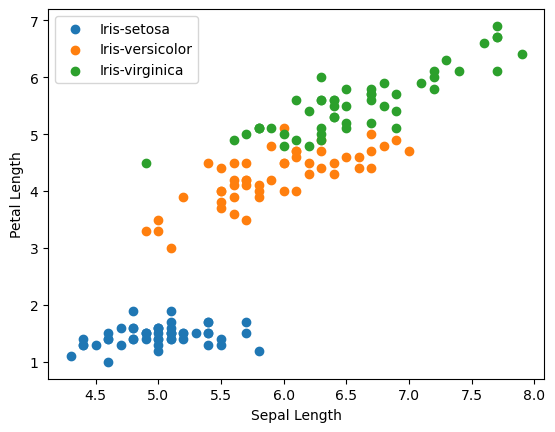

In [20]:
for i in range(len(species)):
    x = df[ df['Species'] == species[i] ]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], label = species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

From the above plot we can see, iris-setosa has same sepal length and petal length it is 1 cluster.
iris-versicolor second cluster.

##### Correlation Analysis
    Calculate the correlation coefficients between pair of variables. Correlation coefficients measures the strength and direction of the linear relationship between 2 variables.
    Here you can calculate the correlation coefficient between SepalLengthCm and SepalWidthCm, PetalLengthCm and PetalWidthCm.

In [21]:
# show correlation matrix between numerical variables
numerical_df = df.drop(['Species'], axis = 1)


In [22]:
numerical_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Correlation close to 1 or -1 indicates strong relationship and correlation close to 0 indicates no linear relationship.

#### Data Spliting: 

In [23]:
X = df.drop(['Species'], axis = 1)
y = df['Species']

In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Choose Model:

Select a classification algorithm. Common choices include Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN).

#### Train Model:

##### 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train, y_train)

LogisticRegression()

#### Evaluate Model:

Assess the model's performance on the testing data using appropriate evaluation metrics such as accuracy, precision, recall, or F1-score.

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
y_pred = lr.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)

In [32]:
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [33]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Predictions

In [35]:
new_data = [[5.1, 3.5, 1.4, 0.2], [6.2, 2.9, 4.3, 1.3]]  # Example new data
predictions = lr.predict(new_data)
print("Predictions:", predictions)

Predictions: ['Iris-setosa' 'Iris-versicolor']


#### Conclusion: 
    Based on measurements i.e. SepalLength, SepalWidth, PetalLength, PetalWidth in centimeters decised which type of flower speices is.